In [26]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from Slope import plotSlope

In [27]:
%store -r df
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,day,year,str_month_no,start_hour,end_hour,duration_min,day_type,age,season,distance
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,Sun,2017,12,16,15,1335.166667,Weekend,30,Winter,0.944876
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,...,Sun,2017,12,15,13,1313.333333,Weekend,52,Winter,3.071144
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,...,Sun,2017,12,14,2,726.716667,Weekend,20,Winter,0.637772


In [28]:
#Chekcing the number of rows and columns
df.shape

(1001173, 26)

In [29]:
# Data type information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001173 entries, 0 to 179105
Data columns (total 26 columns):
duration_sec               1001173 non-null int64
start_time                 1001173 non-null datetime64[ns]
end_time                   1001173 non-null datetime64[ns]
start_station_id           1001173 non-null int64
start_station_name         1001173 non-null object
start_station_latitude     1001173 non-null float64
start_station_longitude    1001173 non-null float64
end_station_id             1001173 non-null int64
end_station_name           1001173 non-null object
end_station_latitude       1001173 non-null float64
end_station_longitude      1001173 non-null float64
bike_id                    1001173 non-null int64
user_type                  1001173 non-null object
member_birth_year          1001173 non-null float64
member_gender              1001173 non-null object
month                      1001173 non-null object
day                        1001173 non-null object
year

### 3. Time : 

**A) Compare the average number and average duration of trips made on each the days of the weeks.**


**To simplify the analysis- it is convenient to drop some of the columns that we do not need to explore the time variable.**

In [30]:
# Drop 13 columns that are not currently needed
df_time = df.drop(['duration_sec','start_time','end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude','end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id','member_birth_year' ], axis=1)

In [31]:
# See the shape of the dataset- should return 13 columns 
df_time.shape

(1001173, 13)

In [32]:
#See the first 3 rows
df_time.head(3)

,user_type,member_gender,month,day,year,str_month_no,start_hour,end_hour,duration_min,day_type,age,season,distance
0,Customer,Male,Dec,Sun,2017,12,16,15,1335.166667,Weekend,30,Winter,0.944876
1,Customer,Female,Dec,Sun,2017,12,15,13,1313.333333,Weekend,52,Winter,3.071144
4,Subscriber,Female,Dec,Sun,2017,12,14,2,726.716667,Weekend,20,Winter,0.637772


In [33]:
avg_duration = df_time.groupby(['day']).mean().duration_min.reset_index().sort_values('duration_min', ascending=False)
avg_duration

,day,duration_min
2,Sat,16.361007
3,Sun,16.010844
0,Fri,12.324739
1,Mon,11.973838
4,Thu,11.878447
5,Tue,11.844706
6,Wed,11.794532


<Figure size 1152x864 with 0 Axes>

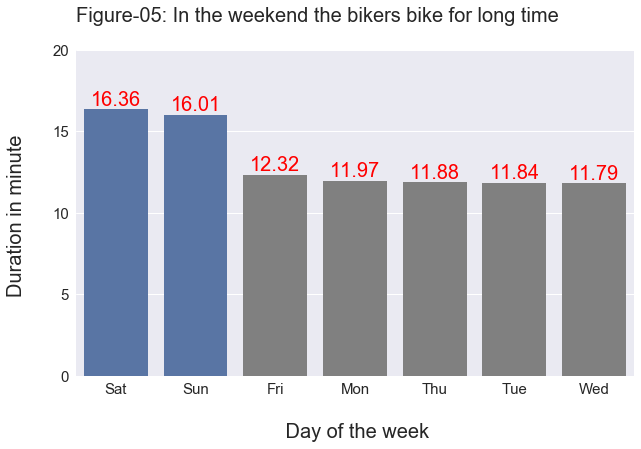

In [34]:
plt.figure(figsize = [16, 12])
values = np.array(avg_duration['duration_min'])  
idx = np.array(list(avg_duration['day'])) 

color = sns.color_palette()
base_color = base_color = sns.color_palette()[0]
clrs = ['grey'if (x < 16) else base_color for x in values ]

plt.figure(figsize = [10, 6])
sns.set(style="darkgrid")
ax = sns.barplot(x=idx, y=values, palette=clrs)


y_data = pd.Series(avg_duration['duration_min'])
x_labels = avg_duration['day']
plt.yticks(np.arange(0, 22, 5.0), fontsize=15)
plt.xticks(fontsize=15)

plt.xlabel(" \n Day of the week",fontsize=20)
plt.ylabel("Duration in minute \n",fontsize=20)
plt.title('Figure-05: In the weekend the bikers bike for long time\n',fontsize=20,loc="left")


# Plot the figure.
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 0 # Number of points between bar and label. 
    va = 'bottom' # Vertical alignment for positive values

    label = "{:.2f}".format(y_value) # Use Y value as label and format number with tw0 decimal place

    # Create annotation
    plt.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', 
                 va=va,fontsize=20, color= 'red')
    sns.despine(bottom=True, left=True)
   

In [35]:
duration_per_season = df_time.groupby(['season', 'day_type']).mean().duration_min.reset_index().sort_values('duration_min', ascending=False)
duration_per_season

,season,day_type,duration_min
5,Summer,Weekend,21.581092
1,Autumn,Weekend,16.763209
3,Spring,Weekend,15.242106
7,Winter,Weekend,15.067248
4,Summer,Weekday,13.378767
0,Autumn,Weekday,12.287450
2,Spring,Weekday,11.643097
6,Winter,Weekday,11.479699


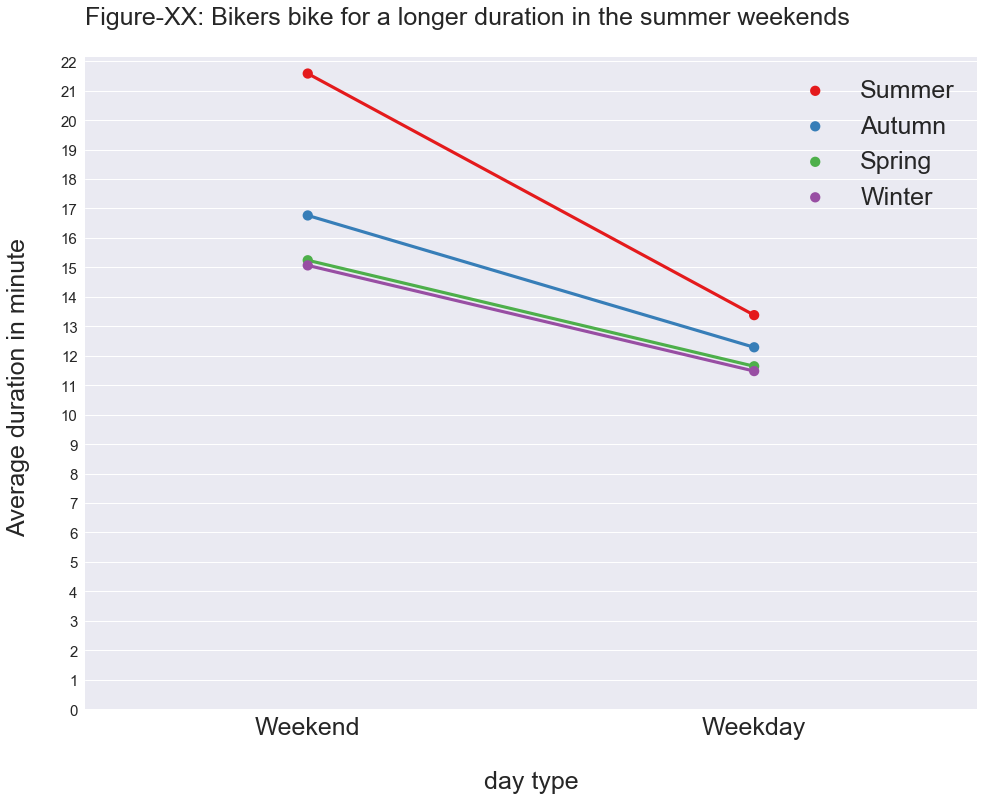

In [36]:
plt.figure(figsize = [16, 12])

sns.set(style="darkgrid")
ax = sns.pointplot(x="day_type", y="duration_min", hue="season", data= duration_per_season, palette="Set1")
plt.xlabel("\n day type ",fontsize=25)
plt.ylabel("Average duration in minute \n",fontsize=25)
plt.title('Figure-XX: Bikers bike for a longer duration in the summer weekends\n',fontsize=25, loc="left")
plt.yticks(np.arange(0, max(duration_per_season['duration_min'])+1, 1.0), fontsize=15)
plt.xticks(fontsize=25)
plt.legend(loc='upper right', fontsize=25)

plt.show()

**3-B) Show the percentage of journey taken during diffrent time of day, day of the week, month and Season of the year?**

In [37]:
df_subscriber = df_time.query('user_type == "Subscriber"')
df_customer = df_time.query('user_type == "Customer"')

In [16]:
df_sub_per_hour= df_subscriber['start_hour'].value_counts().sort_index()
df_cus_per_hour= df_customer['start_hour'].value_counts().sort_index()

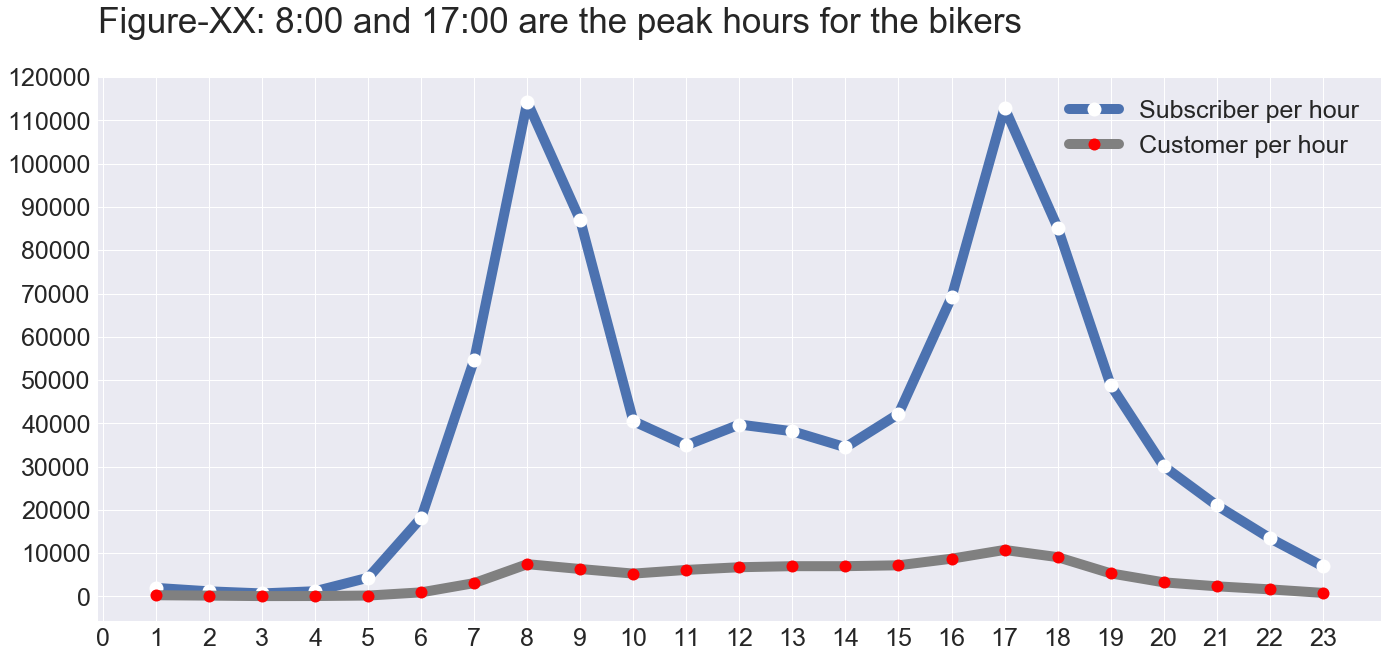

In [73]:
plt.figure(figsize = [16, 12])
color = sns.color_palette()
df_sub_per_hour.plot.line(x='hour', color = base_color,label='Subscriber per hour', 
                                                                  marker='o', markerfacecolor='white', markersize=14, linewidth=10)
df_cus_per_hour.plot.line(x='hour', marker='o', color= 'grey', 
                                                                markerfacecolor='red', markersize=12, linewidth=10,
                                                                label='Customer per hour',figsize = (23,10))
plt.xticks(np.arange(0, max(df_subscriber['start_hour'])+1, 1.0),fontsize=25)
plt.yticks(np.arange(0, max(df_subscriber['start_hour'].value_counts())+10000, 10000.0),fontsize=25)
plt.title('Figure-XX: 8:00 and 17:00 are the peak hours for the bikers \n',fontsize=35,loc="left")
plt.legend(fontsize=25, loc= 'upper right')
plt.show()

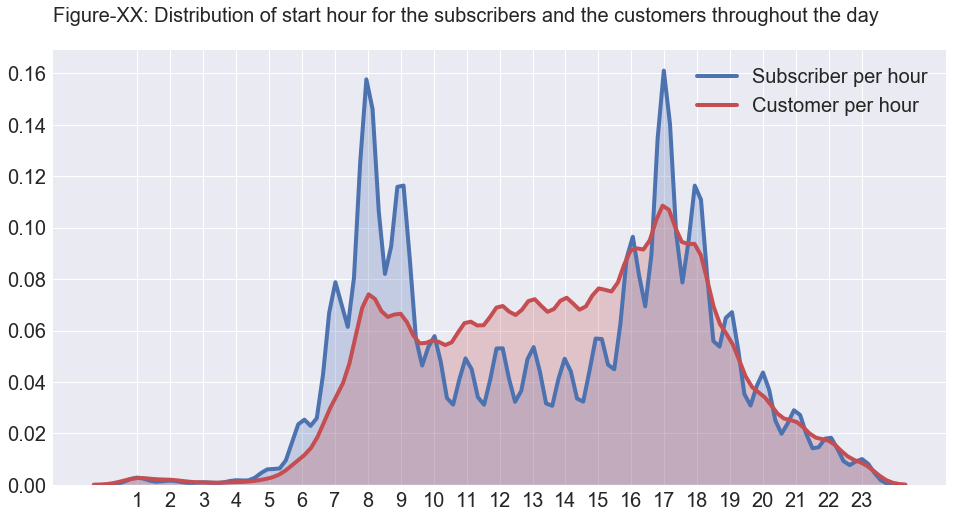

In [76]:
plt.figure(figsize = [16, 8])
sns.kdeplot(df_subscriber['start_hour'],shade=True, color = sns.color_palette()[0], label='Subscriber per hour', linewidth=4)
plt.xticks(np.arange(min(df_subscriber['start_hour']), max(df_subscriber['start_hour'])+1, 1.0),fontsize=20)
plt.yticks(fontsize=20)

sns.kdeplot(df_customer['start_hour'],shade=True,color = sns.color_palette()[2],label='Customer per hour',linewidth=4)
plt.title('Figure-XX: Distribution of start hour for the subscribers and the customers throughout the day \n',fontsize=20,loc="left")
plt.legend(fontsize=20, loc= 'upper right')
sns.despine(bottom=True, left=True)

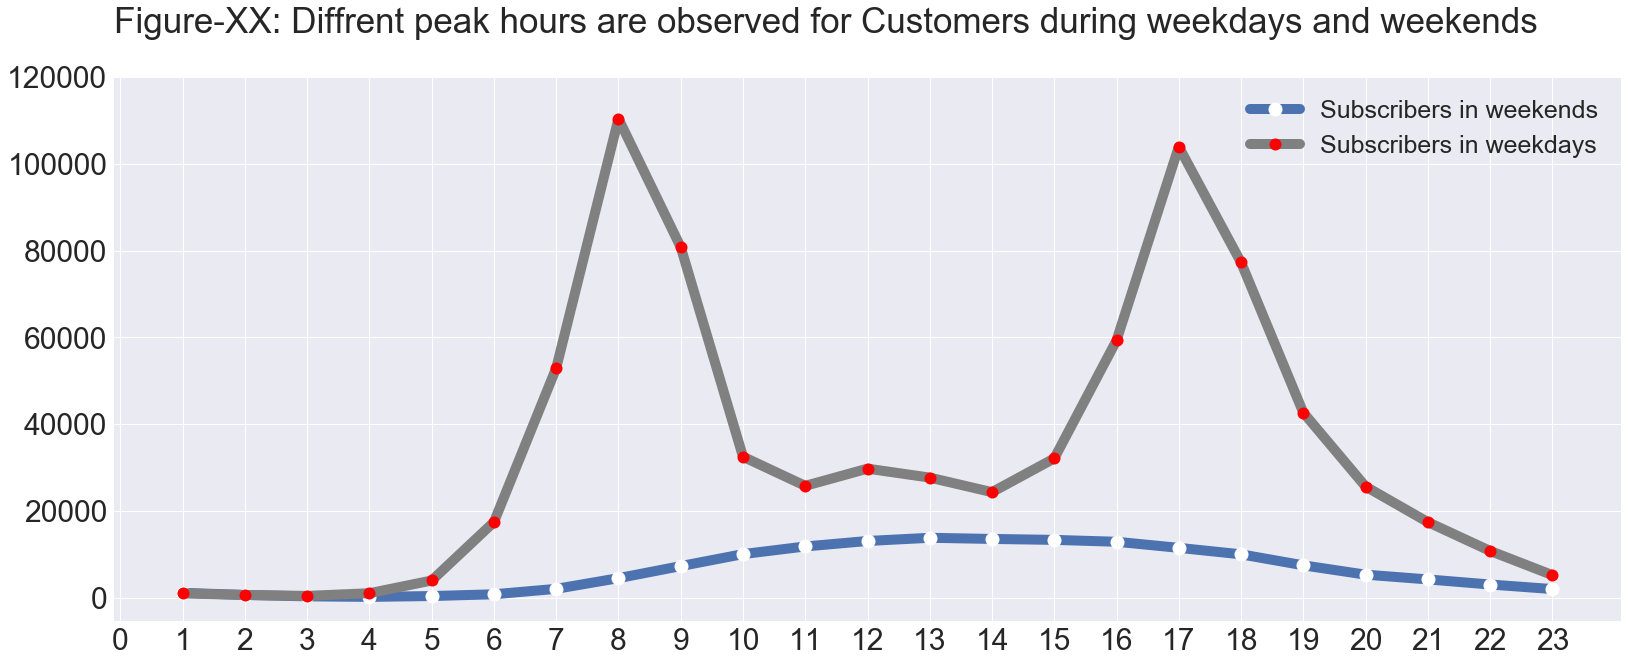

In [77]:
plt.figure(figsize = [16, 12])
df_subscriber_weekend = df.query('day_type == "Weekend"')['start_hour'].value_counts()
df_subscriber_weekdays = df_subscriber.query('day_type == "Weekday"')['start_hour'].value_counts()


df_subscriber_weekend.sort_index().plot.line(x='hour', color = base_color,label='Subscribers in weekends', 
                                                                  marker='o', markerfacecolor='white', markersize=14, linewidth=10)
df_subscriber_weekdays.sort_index().plot.line(x='hour', marker='o', color= 'grey', 
                                                                markerfacecolor='red', markersize=12, linewidth=10,
                                                                label='Subscribers in weekdays',figsize = (27,10))



plt.xticks(np.arange(0, max(df_subscriber['start_hour'])+1, 1.0),fontsize=30)
plt.yticks(np.arange(0, max(df_subscriber_weekdays)+10000, 20000.0),fontsize=30)
plt.title('Figure-XX: Diffrent peak hours are observed for Customers during weekdays and weekends\n',fontsize=35,loc="left")
plt.legend(fontsize=25, loc= 'best')

plt.show()



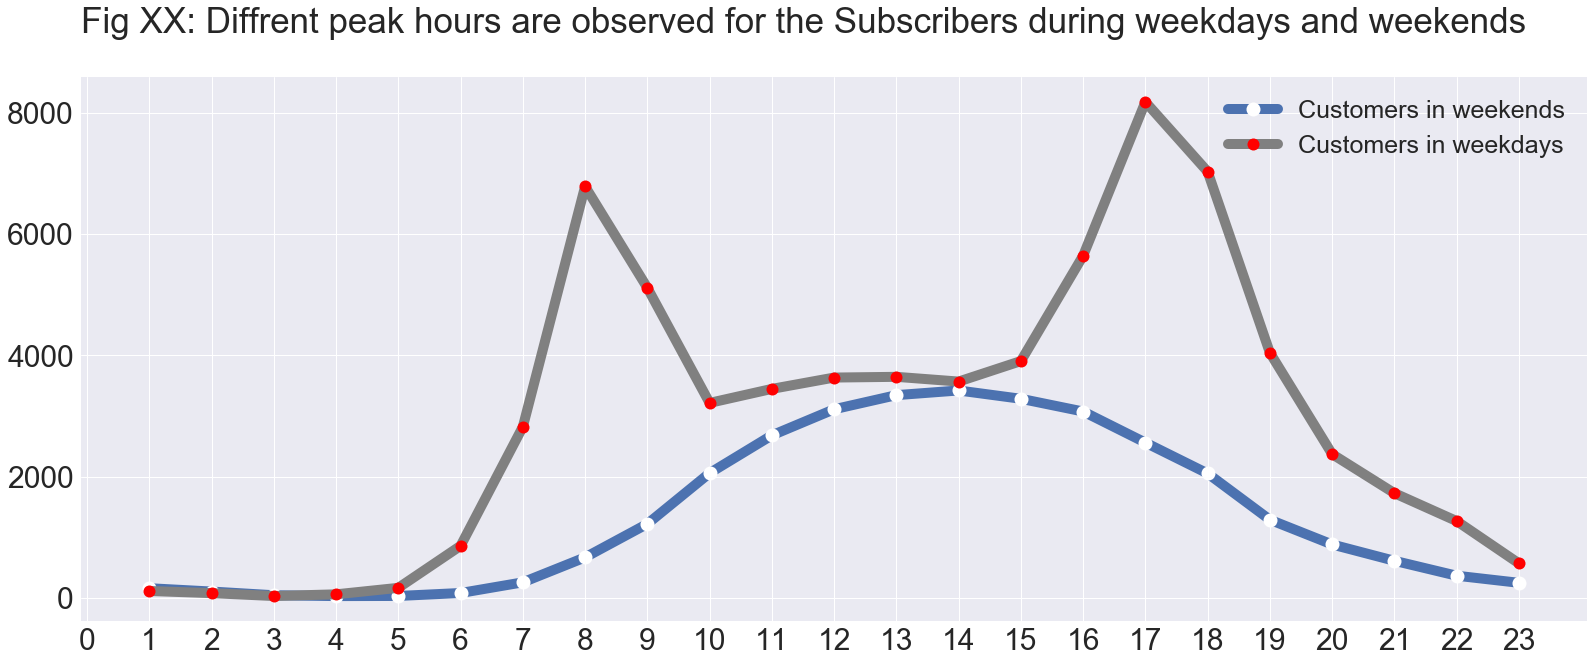

In [78]:
plt.figure(figsize = [16, 12])
df_customer_weekend = df_customer.query('day_type == "Weekend"')['start_hour'].value_counts()
df_customer_weekdays = df_customer.query('day_type == "Weekday"')['start_hour'].value_counts()


df_customer_weekend.sort_index().plot.line(x='hour', color = base_color,label='Customers in weekends', 
                                                                  marker='o', markerfacecolor='white', markersize=14, linewidth=10)
df_customer_weekdays.sort_index().plot.line(x='hour', marker='o', color= 'grey', 
                                                                markerfacecolor='red', markersize=12, linewidth=10,
                                                                label='Customers in weekdays',figsize = (27,10))

plt.xticks(np.arange(0, max(df_subscriber['start_hour'])+1, 1.0),fontsize=30)
plt.yticks(np.arange(0, max(df_customer_weekdays), 2000.0),fontsize=30)
plt.title('Fig XX: Diffrent peak hours are observed for the Subscribers during weekdays and weekends  \n',fontsize=35,loc="left")
plt.legend(fontsize=25, loc= 'best')

plt.show()

In [18]:
values = np.array(df_time['month'].value_counts()/df_time['month'].value_counts().sum()*100)  
values

array([16.15844614, 11.76539919,  9.96451163,  9.61302392,  9.2982931 ,
        8.50092841,  8.37048143,  8.28408277,  7.59519084,  6.7567743 ,
        3.46153961,  0.23132865])

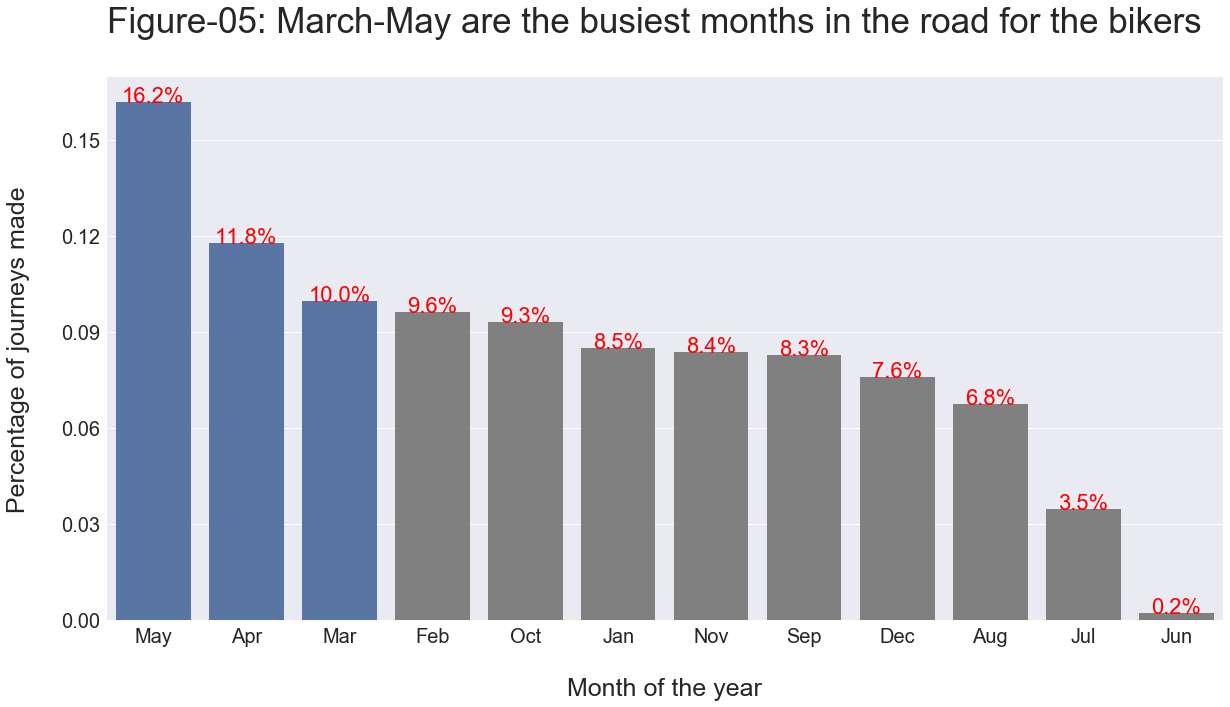

In [71]:
plt.figure(figsize = [20, 10])

color = sns.color_palette()

values = np.array(df_time['month'].value_counts()/df_time['month'].value_counts().sum()*100)  
clrs = ['grey'if (x < 9.8) else base_color for x in values ]

## Plot Proportion of journeys made per Day
n_points = df_time['month'].value_counts().sum()
max_count = df_time['month'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.03)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_time, x = df_time['month'], palette=clrs ,order = df_time['month'].value_counts().index)
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel(" \nMonth of the year",fontsize=25)
plt.ylabel("Percentage of journeys made\n",fontsize=25)
plt.title('Figure-05: March-May are the busiest months in the road for the bikers\n',fontsize=35,loc="left")
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

# add annotations
cat_counts = df_time['month'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=22)
    sns.despine(bottom=True, left=True)

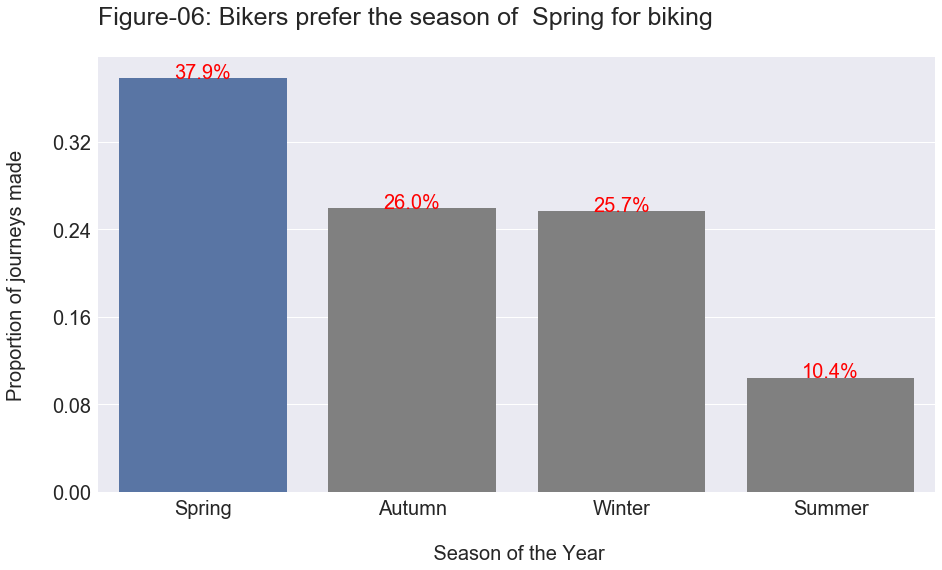

In [80]:
## Plot the percentage of movie released per quarter

values = np.array( df_time['season'].value_counts()/ df_time['season'].value_counts().sum()*100)
base_color = sns.color_palette()[0]
clrs = ['grey'if (x < 27) else base_color for x in values]


plt.figure(figsize = [15, 8])

n_points = df_time['season'].value_counts().sum()
max_count = df_time['season'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.08)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_time, x = df_time['season'], palette=clrs, order = df_time['season'].value_counts().index, )
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("\n Season of the Year",fontsize=20)
plt.ylabel("Proportion of journeys made\n",fontsize=20)
plt.title('Figure-06: Bikers prefer the season of  Spring for biking\n',fontsize=25,loc="left")
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)


# add annotations
cat_counts = df_time['season'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=20)
    sns.despine(bottom=True, left=True)

In [21]:
np.percentile(df_time.duration_min, 99.5)

101.74033333333404

In [22]:
df_time.duration_min.median()

9.0

In [23]:
df_time.duration_min.max()

1437.5333333333333

In [24]:
# Creates bin edges for duration of biking
bin_edges = [0,15, 30, 1437]
# Creates bin names based on the runtime
bin_names = ['1-15 min','16-30 min','31-1437 min']

In [25]:
# Creates decade_levels column based on the year of release
df_time['dur_cat'] = pd.cut(df_time['duration_min'], bin_edges, labels = bin_names)
df_time.head()

,user_type,member_gender,month,day,year,str_month_no,start_hour,end_hour,duration_min,day_type,age,season,distance,dur_cat
0,Customer,Male,Dec,Sun,2017,12,16,15,1335.166667,Weekend,30,Winter,0.944876,31-1437 min
1,Customer,Female,Dec,Sun,2017,12,15,13,1313.333333,Weekend,52,Winter,3.071144,31-1437 min
4,Subscriber,Female,Dec,Sun,2017,12,14,2,726.716667,Weekend,20,Winter,0.637772,31-1437 min
28,Subscriber,Male,Dec,Sun,2017,12,23,23,14.516667,Weekend,38,Winter,0.623898,1-15 min
32,Subscriber,Female,Dec,Sun,2017,12,23,23,12.216667,Weekend,37,Winter,0.623898,1-15 min


In [26]:
# Creates decade_levels column based on the year of release
df_subscriber['dur_cat'] = pd.cut(df_subscriber['duration_min'], bin_edges, labels = bin_names)
df_customer['dur_cat'] = pd.cut(df_customer['duration_min'], bin_edges, labels = bin_names)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
duration_cat = df_time.groupby(['dur_cat']).user_type.size().reset_index(name='number')
duration_cat.number.sum()

1001172

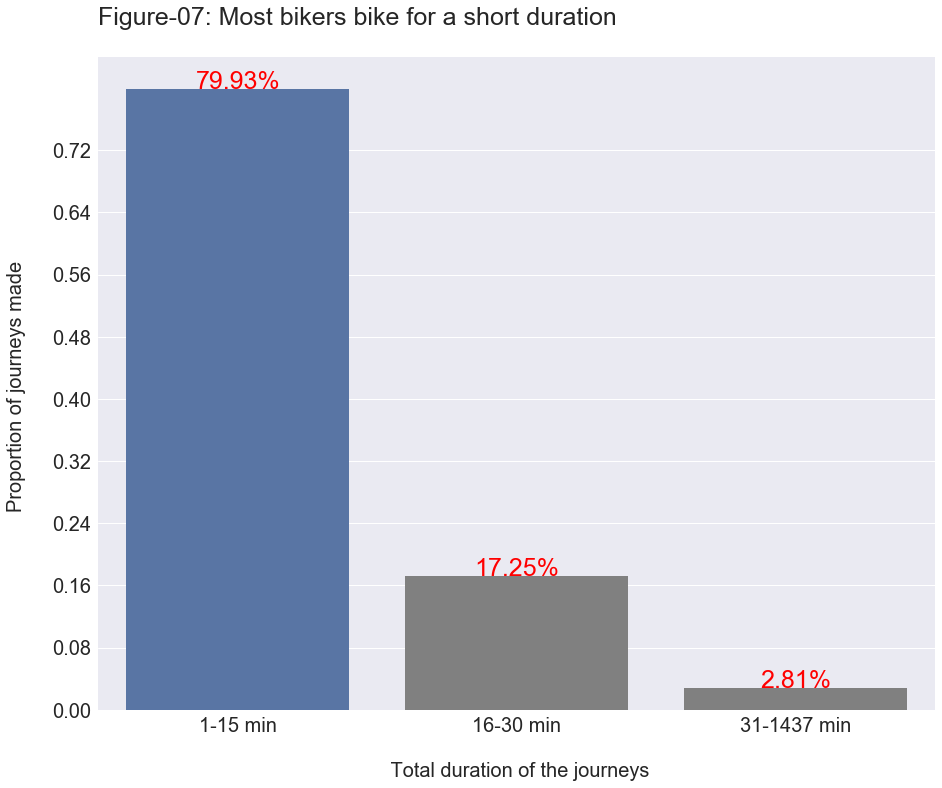

In [28]:
## Plot the percentage of movie released per quarter
plt.figure(figsize = [15, 12])
base_color = sns.color_palette()[0]
n_points = df_time['dur_cat'].value_counts().sum()
max_count = df_time['dur_cat'].value_counts().max()
max_prop = max_count/ n_points

values = np.array( df_time['dur_cat'].value_counts()/ df_time['dur_cat'].value_counts().sum()*100)  
clrs = ['grey'if (x < 19) else base_color for x in values]

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.08)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_time, x = df_time['dur_cat'], palette=clrs, order = df_time['dur_cat'].value_counts().index)
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("\n Total duration of the journeys",fontsize=20)
plt.ylabel("Proportion of journeys made \n",fontsize=20)
plt.title('Figure-07: Most bikers bike for a short duration \n',fontsize=25,loc="left")
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

# add annotations
cat_counts = df_time['dur_cat'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.2f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'r', fontsize=25)
    sns.despine(bottom=True, left=True)
   


In [29]:
np.percentile(df_time.duration_min, 75)

13.583333333333334

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


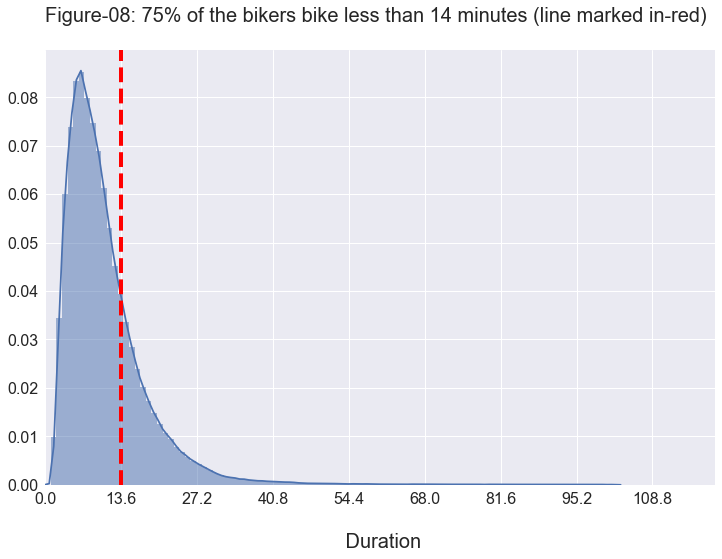

In [30]:
plt.figure(figsize = [12, 8])
df_duration_102 = df.query("duration_min<102")
bin_edges = np.arange(0, df_duration_102['duration_min'].max()+1, 1)
sns.distplot(df_duration_102['duration_min'], bins = bin_edges, kde = True, 
            hist_kws = {'alpha' : 0.5})
plt.axvline(np.percentile(df_time.duration_min, 75), c = 'red', linestyle='dashed', linewidth=4)
plt.title('Figure-08: 75% of the bikers bike less than 14 minutes (line marked in-red)\n',fontsize=20,loc="left")
plt.xticks(np.arange(0, 136, 13.6))
plt.xlabel("\n Duration",fontsize=20)
plt.xlim(0, 120)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
sns.despine(bottom=True, left=True)

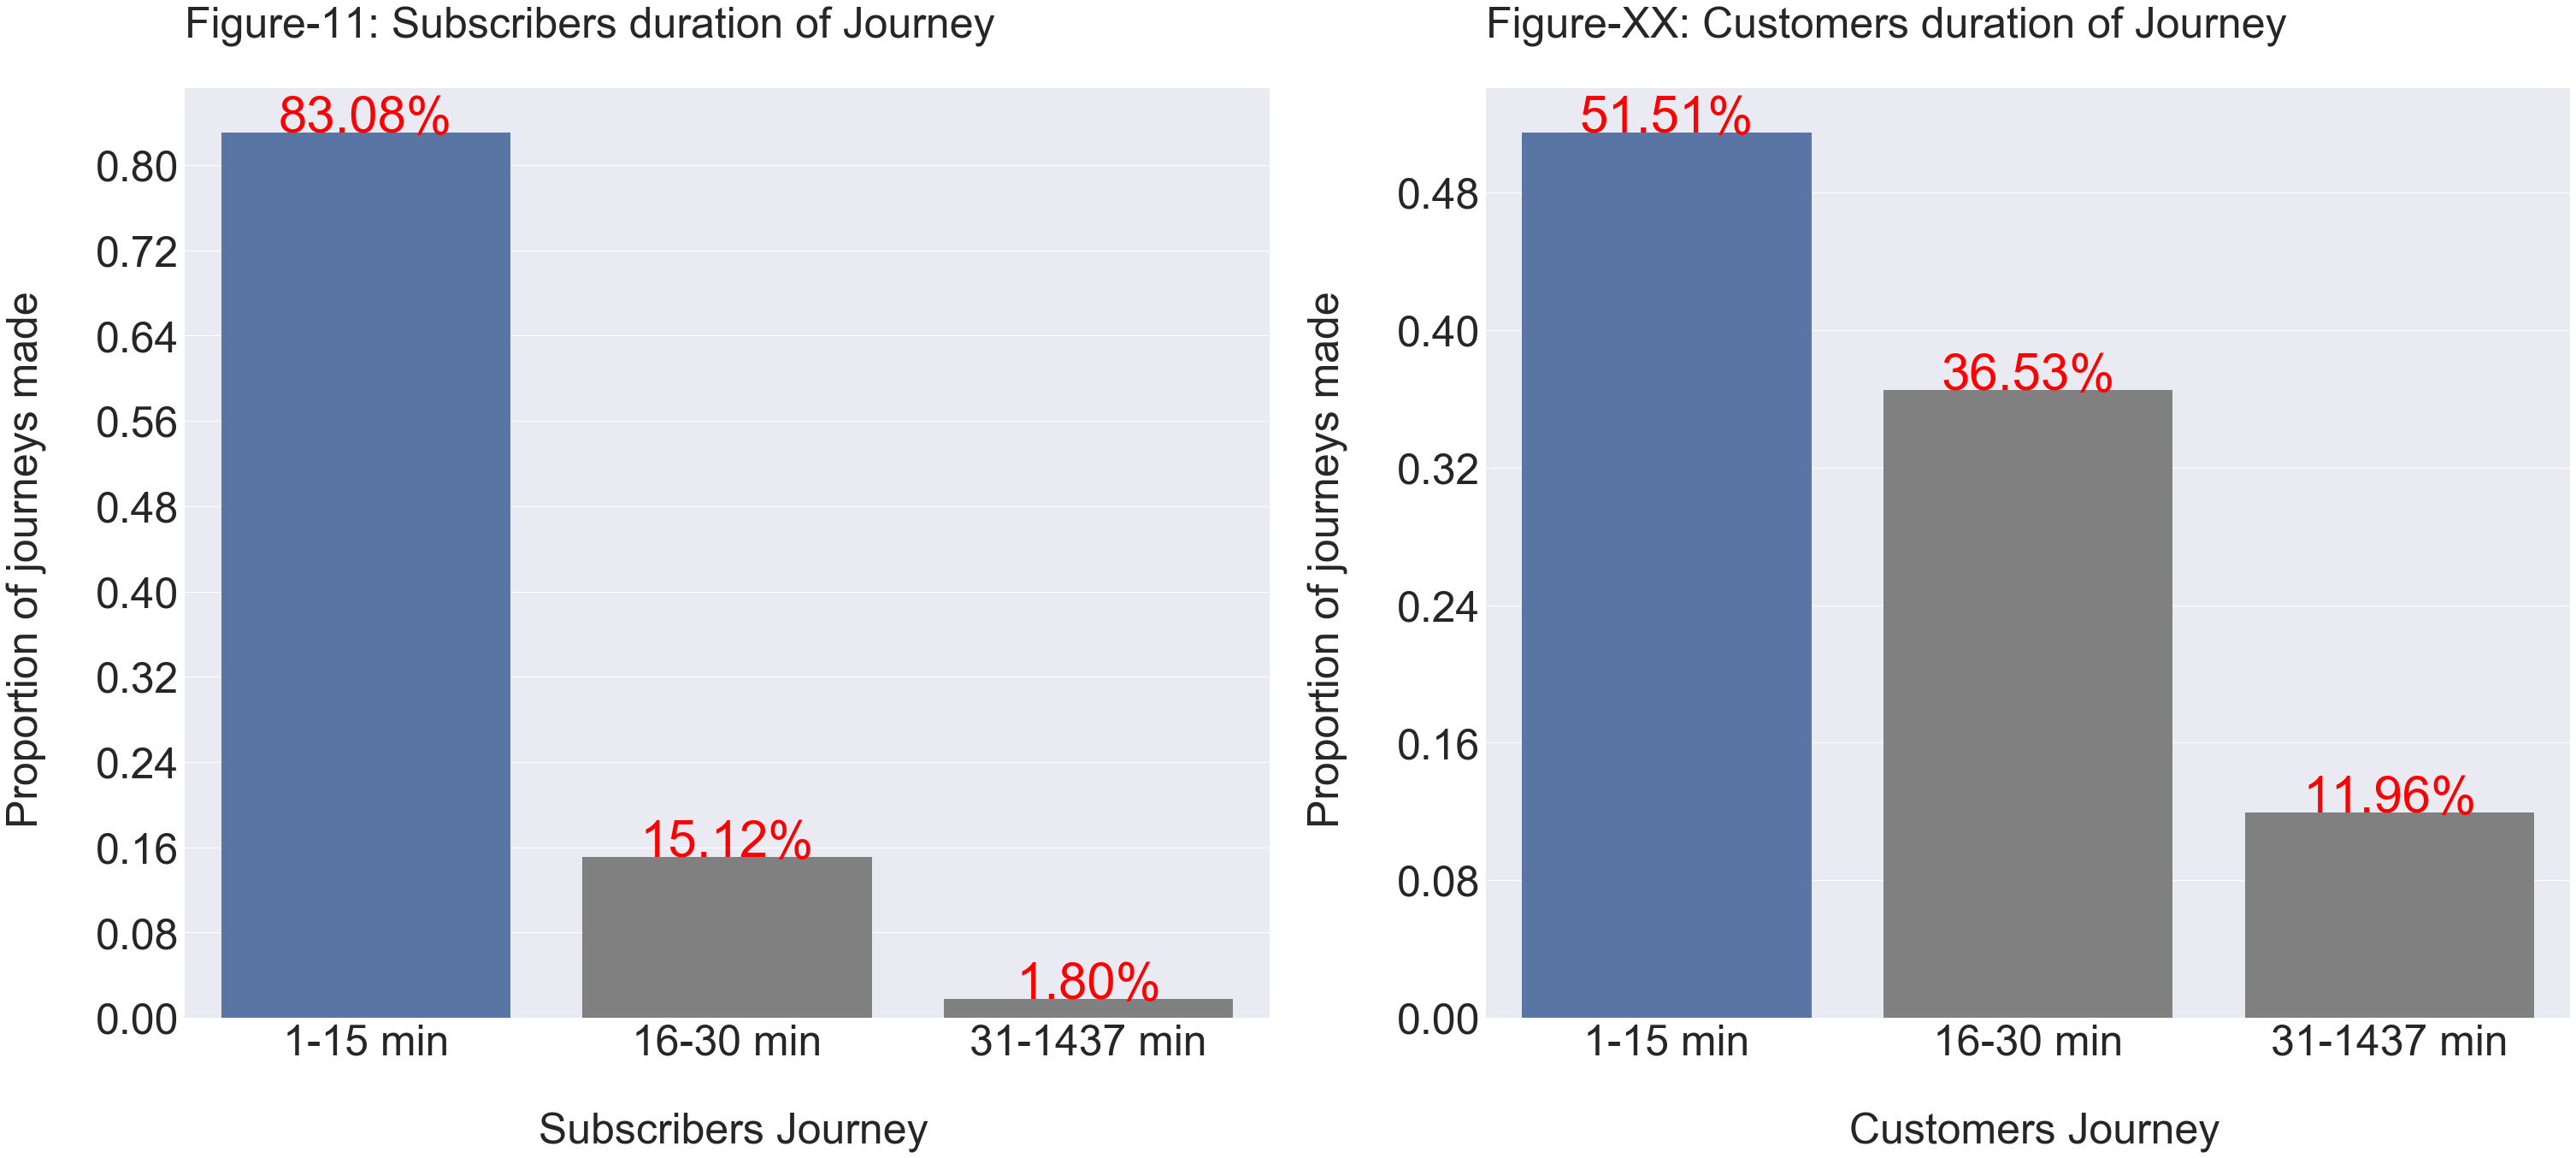

In [82]:
## Plot 
plt.figure(figsize = [50, 20])
plt.subplot(1,2, 1)
base_color = sns.color_palette()[0]
n_points = df_subscriber['dur_cat'].value_counts().sum()
max_count = df_subscriber['dur_cat'].value_counts().max()
max_prop = max_count/ n_points

values = np.array( df_subscriber['dur_cat'].value_counts()/ df_subscriber['dur_cat'].value_counts().sum()*100)  
clrs = ['grey'if (x < values.max()) else base_color for x in values]

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.08)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_subscriber, x = df_subscriber['dur_cat'], palette = clrs, order = df_subscriber['dur_cat'].value_counts().index )
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("\n Subscribers Journey",fontsize=50)
plt.ylabel("Proportion of journeys made \n",fontsize=50)
plt.rc('xtick',labelsize=50)
plt.rc('ytick',labelsize=50)
plt.title('Figure-11: Subscribers duration of Journey\n',fontsize=50,loc="left")
sns.despine(bottom=True, left=True)


# add annotations
cat_counts = df_subscriber['dur_cat'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.2f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=60)
    
    

plt.subplot(1,2, 2)
base_color = sns.color_palette()[0]
n_points = df_customer['dur_cat'].value_counts().sum()
max_count = df_customer['dur_cat'].value_counts().max()
max_prop = max_count/ n_points

values = np.array( df_customer['dur_cat'].value_counts()/ df_customer['dur_cat'].value_counts().sum()*100)  
clrs = ['grey'if (x < values.max()) else base_color for x in values]

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.08)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_customer, x = df_customer['dur_cat'], palette = clrs, order = df_customer['dur_cat'].value_counts().index )
plt.title('Figure-XX: Customers duration of Journey\n',fontsize=50,loc="left")
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("\n Customers Journey",fontsize=50)
plt.ylabel("Proportion of journeys made \n",fontsize=50)
plt.rc('xtick',labelsize=50)
plt.rc('ytick',labelsize=50)

sns.despine(bottom=True, left=True)


# add annotations
cat_counts = df_customer['dur_cat'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.2f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=60)
    

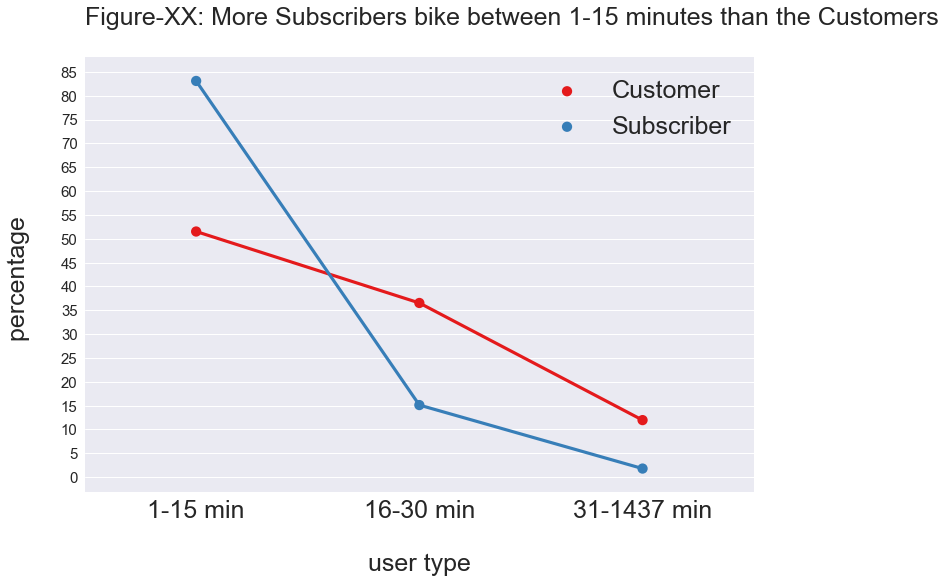

In [32]:
sub_duration = df_subscriber.groupby(['dur_cat'])['user_type'].value_counts()/df_subscriber.groupby(['dur_cat'])['user_type'].value_counts().sum()*100
sub_duration = sub_duration.reset_index(name = 'percentage')
cus_duration = df_customer.groupby(['dur_cat'])['user_type'].value_counts()/df_customer.groupby(['dur_cat'])['user_type'].value_counts().sum()*100
cus_duration = cus_duration.reset_index(name = 'percentage')
user_duration = pd.concat([cus_duration, sub_duration])

plt.figure(figsize = [12, 8])
sns.set(style="darkgrid")
ax = sns.pointplot(x="dur_cat", y="percentage", hue="user_type", data= user_duration, palette="Set1")
plt.xlabel("\n user type ",fontsize=25)
plt.ylabel("percentage \n",fontsize=25)
plt.title('Figure-XX: More Subscribers bike between 1-15 minutes than the Customers \n',fontsize=25, loc="left")
plt.yticks(np.arange(0, 90, 5.0), fontsize=15)
plt.xticks(fontsize=25)
plt.legend(loc='upper right', fontsize=25)

plt.show()


**Note:**

**1. Most Journeys are made during the middle of the week Tuesday- Thursday and the least during the weekend.**

**2. Average Distance covered during the weekend is almost similar to the weekdays although the number journeys are much higher during the weekdays.**

**3. Average durations of the journyes during the weekend is higher than the journys during the weekdays.**




### 4. User type 

**A) What is the percentage of Customer and subscriber?**
 
**B) Show the biking pattern of the Customer and subscriber during the various hours of the day.**



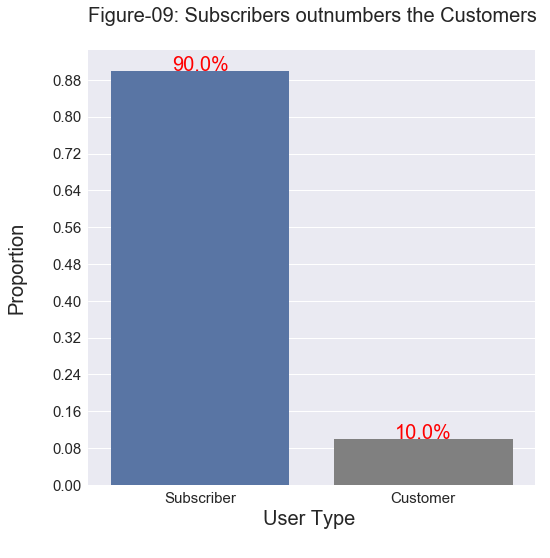

In [84]:
# code for the pie chart seen above
## Plot the percentage of movie released per quarter
plt.figure(figsize = [8, 8])
base_color = sns.color_palette()[0]
n_points = df['user_type'].value_counts().sum()
max_count = df['user_type'].value_counts().max()
max_prop = max_count/ n_points

values = np.array(df['user_type'].value_counts()/ df['user_type'].value_counts().sum()*100)
clrs = ['grey'if (x < 50) else base_color for x in values]


# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.08)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df, x = df['user_type'], palette=clrs, order = df['user_type'].value_counts().index )
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("User Type \n",fontsize=20)
plt.ylabel("Proportion\n",fontsize=20)
plt.title('Figure-09: Subscribers outnumbers the Customers \n',fontsize=20,loc="left")
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

# add annotations
cat_counts = df['user_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=20)
    sns.despine(bottom=True, left=True)

## Distance and Duration by Customers and Subscribers

In [34]:
# Function to find outliers from 25 and 75 percetile values
def find_outliers (df_column):
    
    # input: column of a dataframe
    # outpuer:  lower_limit, upper_limit of the dataframe- outlier values
    
    first_quartile = np.percentile(df_column, 25)
    
    third_quartile = np.percentile(df_column, 75)
    
    IQR = third_quartile-first_quartile
    
    upper_limit = third_quartile + 1.5*IQR
    
    lower_limit = first_quartile -1.5*IQR
    
    return  upper_limit

In [35]:
# Finding the distance in kilometer that would be considered outliers
duration_outlier = find_outliers(df['distance'])
duration_outlier

3.818133903462475

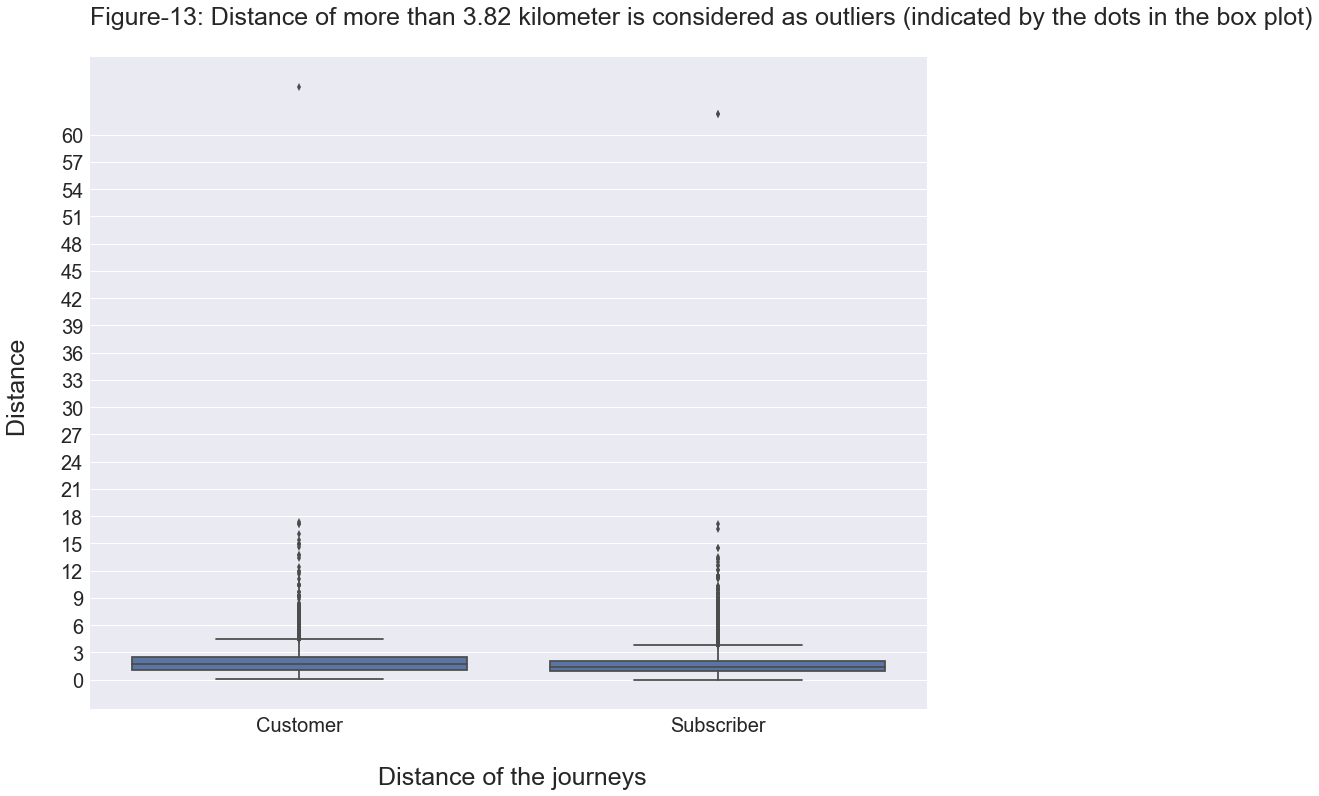

In [86]:
plt.figure(figsize = [15, 12])
base_color = sns.color_palette()[0]
# left plot: violin plot
sns.boxplot(data = df, x = 'user_type', y = 'distance', color = base_color)
plt.xlabel("\n Distance of the journeys",fontsize=25)
plt.ylabel("Distance \n",fontsize=25)
plt.title('Figure-13: Distance of more than 3.82 kilometer is considered as outliers (indicated by the dots in the box plot)\n',fontsize=25,loc="left")
plt.yticks(np.arange(0, 61, 3))
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
sns.despine(bottom=True, left=True)


In [37]:
#Finding the minimum and the maximum distance by the customer
df_customer['distance'].min(),df_customer['distance'].max()


(0.02200283346585486, 65.30812497282311)

In [38]:
#Finding the minimum and the maximum distance by the customer
df_subscriber['distance'].min(),df_subscriber['distance'].max()

(0.013307063673057916, 62.24598393668967)

In [39]:
# median distance of the customers 
df_customer['distance'].median()

1.6773062911317969

In [40]:
# median distance of the customers 
df_subscriber['distance'].median()

1.3902440262661981

In [41]:
# Calculaitng 99.99% percentile
ninetynine_percentile_distance_customer = np.percentile(df_customer.distance, 99)
ninetynine_percentile_distance_subscriber = np.percentile(df_subscriber.distance, 99)
ninetynine_percentile_distance_customer, ninetynine_percentile_distance_subscriber

(5.0699060610514906, 4.670497675815256)

In [42]:
df_customer_majority_distance = df_customer.query('distance < 5.1') 
df_subscriber_majority_distance = df_subscriber.query('distance < 4.8') 

In [43]:
df_customer.describe().distance

count    99950.000000
mean         1.906899
std          1.094007
min          0.022003
25%          1.116384
50%          1.677306
75%          2.456319
max         65.308125
Name: distance, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


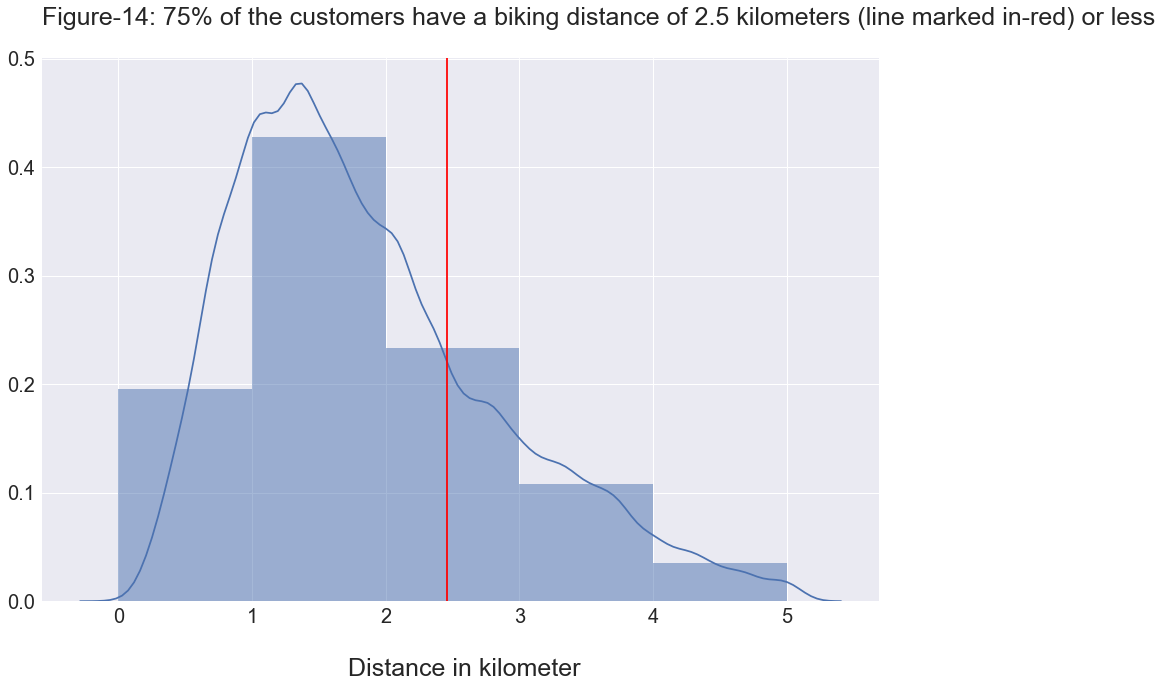

In [44]:
plt.figure(figsize = [15, 10])
bin_edges = np.arange(0, df_customer_majority_distance.distance.max(), 1)
sns.distplot(df_customer_majority_distance['distance'], bins = bin_edges, kde = True,
            hist_kws = {'alpha' : 0.5})
plt.axvline(np.percentile(df_customer.distance, 75), c = 'red')
plt.xlabel("\n Distance in kilometer",fontsize=25)
plt.title('Figure-14: 75% of the customers have a biking distance of 2.5 kilometers (line marked in-red) or less \n',fontsize=25,loc="left")
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
sns.despine(bottom=True, left=True)

In [45]:
# Finding the distance in kilometer that would be considered outliers
duration_outlier_customers = find_outliers(df_customer['distance'])
duration_outlier_customers

4.466219559895201

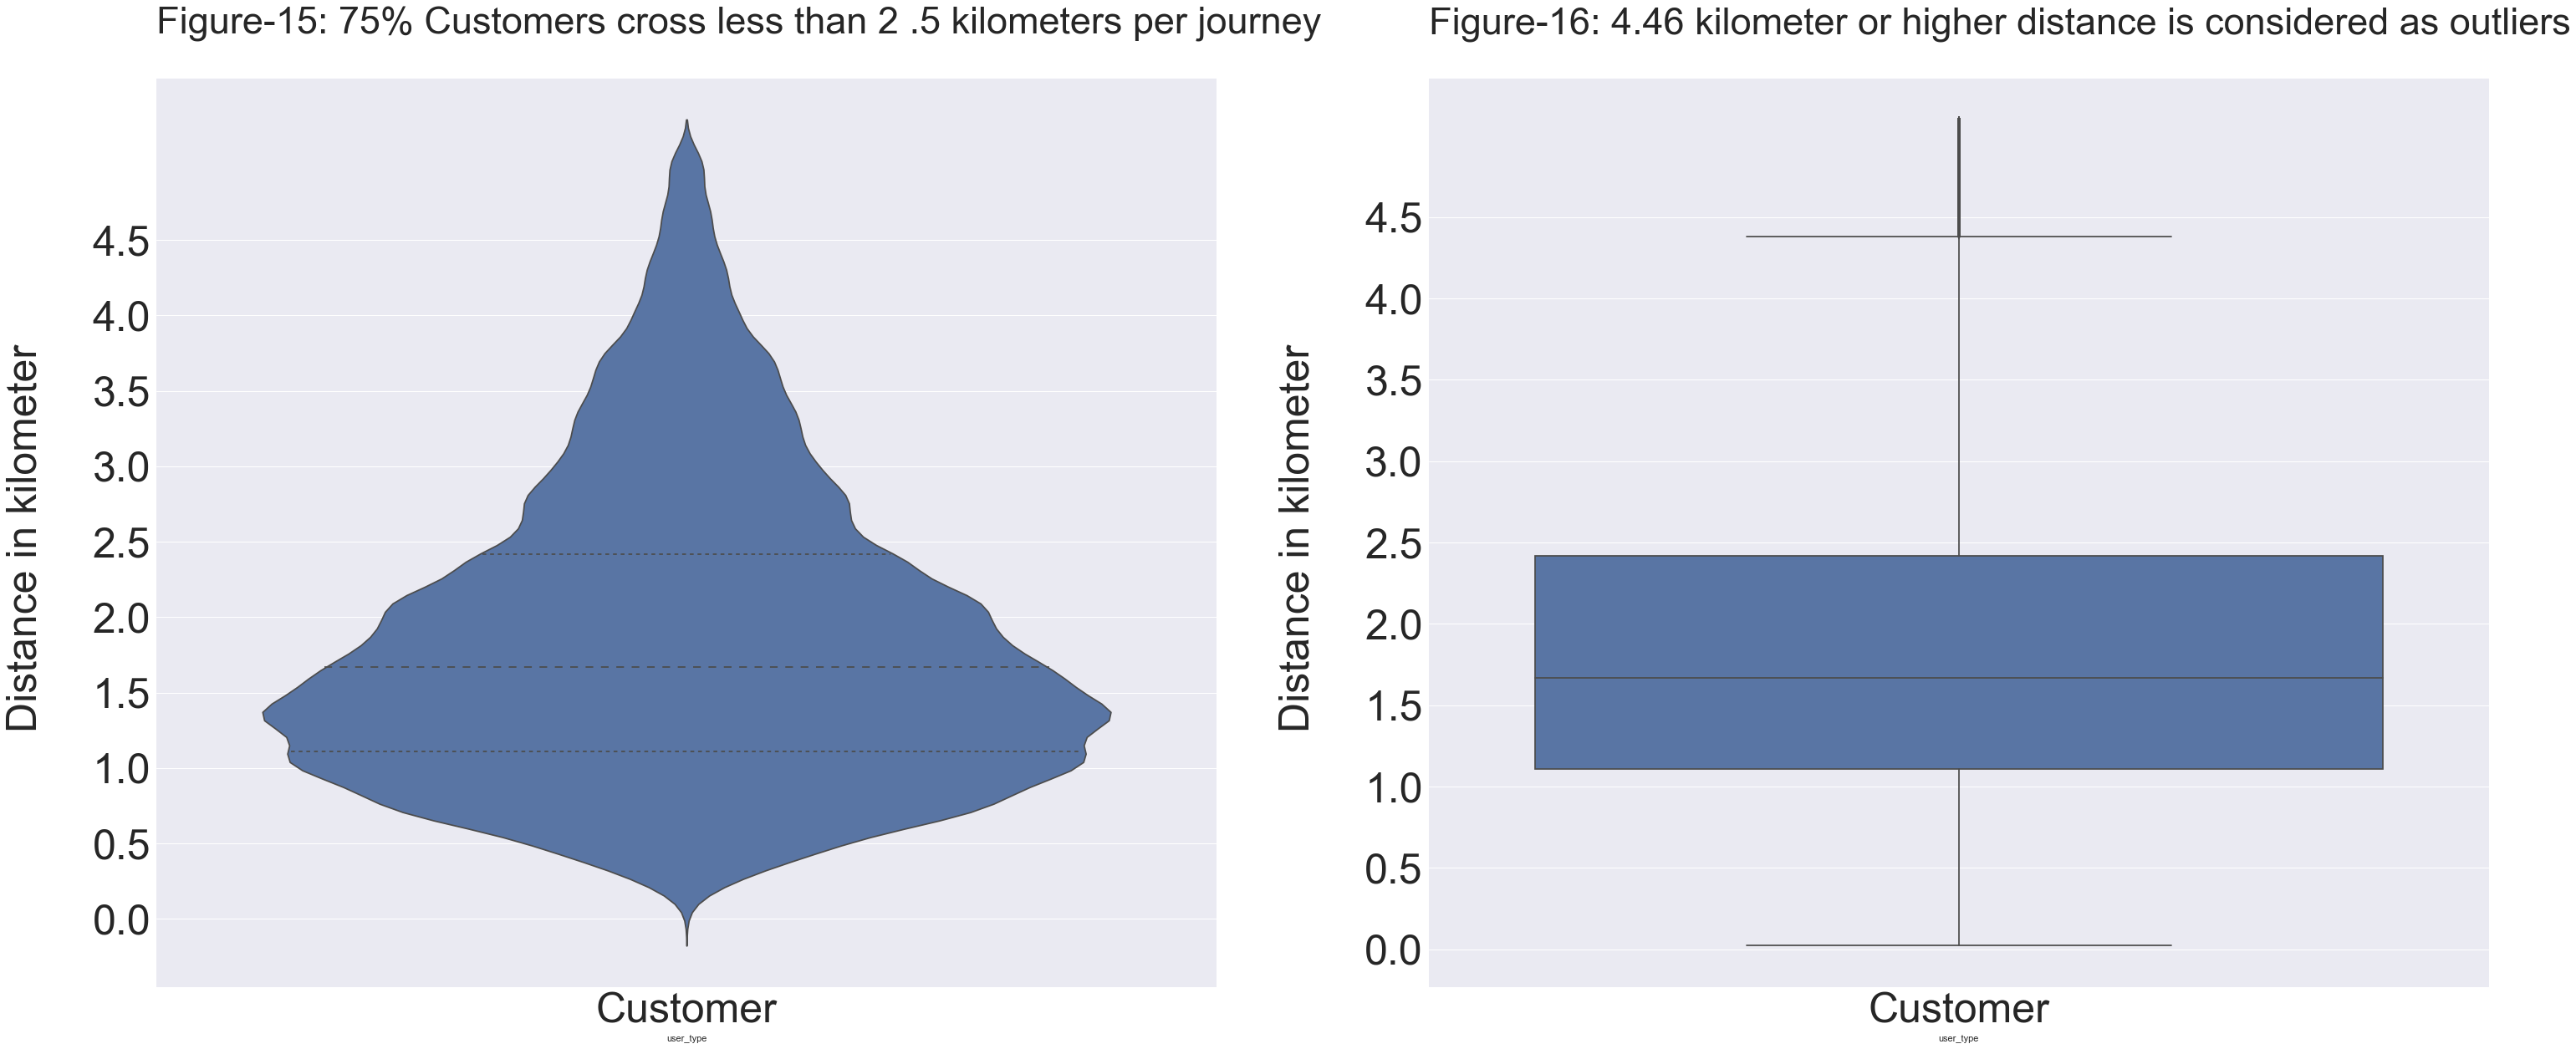

In [90]:
plt.figure(figsize = [50, 20])
# left plot: violin plot
base_color = sns.color_palette()[0]
plt.subplot(1, 2, 1)
sns.violinplot(data = df_customer_majority_distance, x = 'user_type', y = 'distance', color = base_color, inner='quartile')
plt.title('Figure-15: 75% Customers cross less than 2 .5 kilometers per journey\n',fontsize=45,loc="left")
plt.ylabel("Distance in kilometer \n",fontsize=50)
plt.rc('xtick',labelsize=50)
plt.rc('ytick',labelsize=50)
plt.yticks(np.arange(0, 5, 0.5))
sns.despine(bottom=True, left=True)


plt.subplot(1, 2, 2)
sns.boxplot(data = df_customer_majority_distance, x = 'user_type', y = 'distance', color = base_color)
plt.title('Figure-16: 4.46 kilometer or higher distance is considered as outliers\n',fontsize=45,loc="left")
plt.ylabel("Distance in kilometer \n",fontsize=50)
plt.rc('xtick',labelsize=50)
plt.rc('ytick',labelsize=50)
plt.yticks(np.arange(0, 5, 0.5))
sns.despine(bottom=True, left=True)

In [47]:
df_subscriber.describe().distance

count    901223.000000
mean          1.602259
std           0.961826
min           0.013307
25%           0.917098
50%           1.390244
75%           2.056916
max          62.245984
Name: distance, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


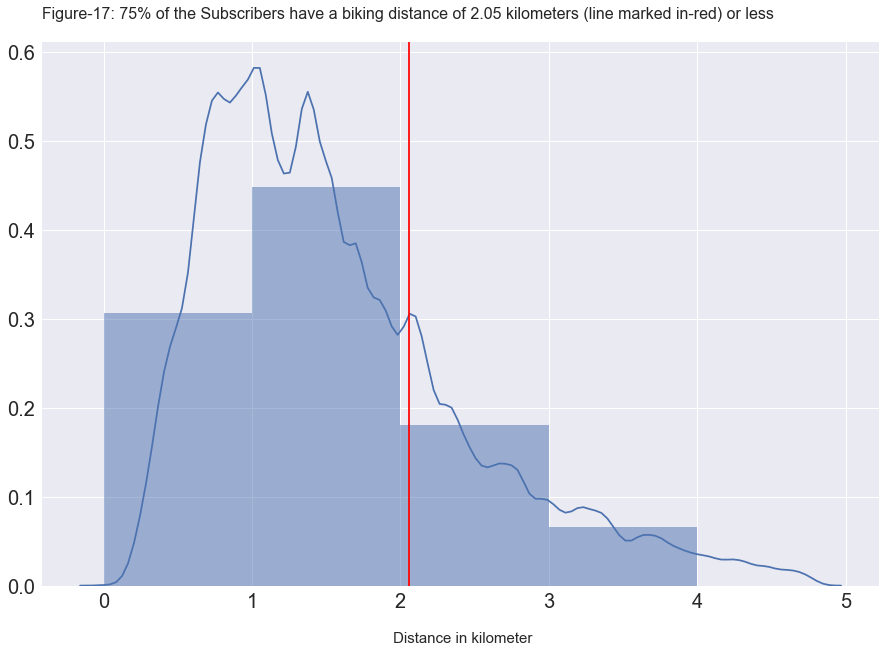

In [92]:
plt.figure(figsize = [15, 10])
bin_edges = np.arange(0, df_subscriber_majority_distance.distance.max(), 1)
sns.distplot(df_subscriber_majority_distance['distance'], bins = bin_edges, kde = True,
            hist_kws = {'alpha' : 0.5})
plt.axvline(np.percentile(df_subscriber.distance, 75), c = 'red')
plt.xlabel("\n Distance in kilometer",fontsize=15)
plt.title('Figure-17: 75% of the Subscribers have a biking distance of 2.05 kilometers (line marked in-red) or less \n',fontsize=16,loc="left")
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
sns.despine(bottom=True, left=True)

In [49]:
# Finding the time that would be considered outliers for runtime
distance_outliers = find_outliers(df_subscriber['distance'])
distance_outliers 

3.76664272486119

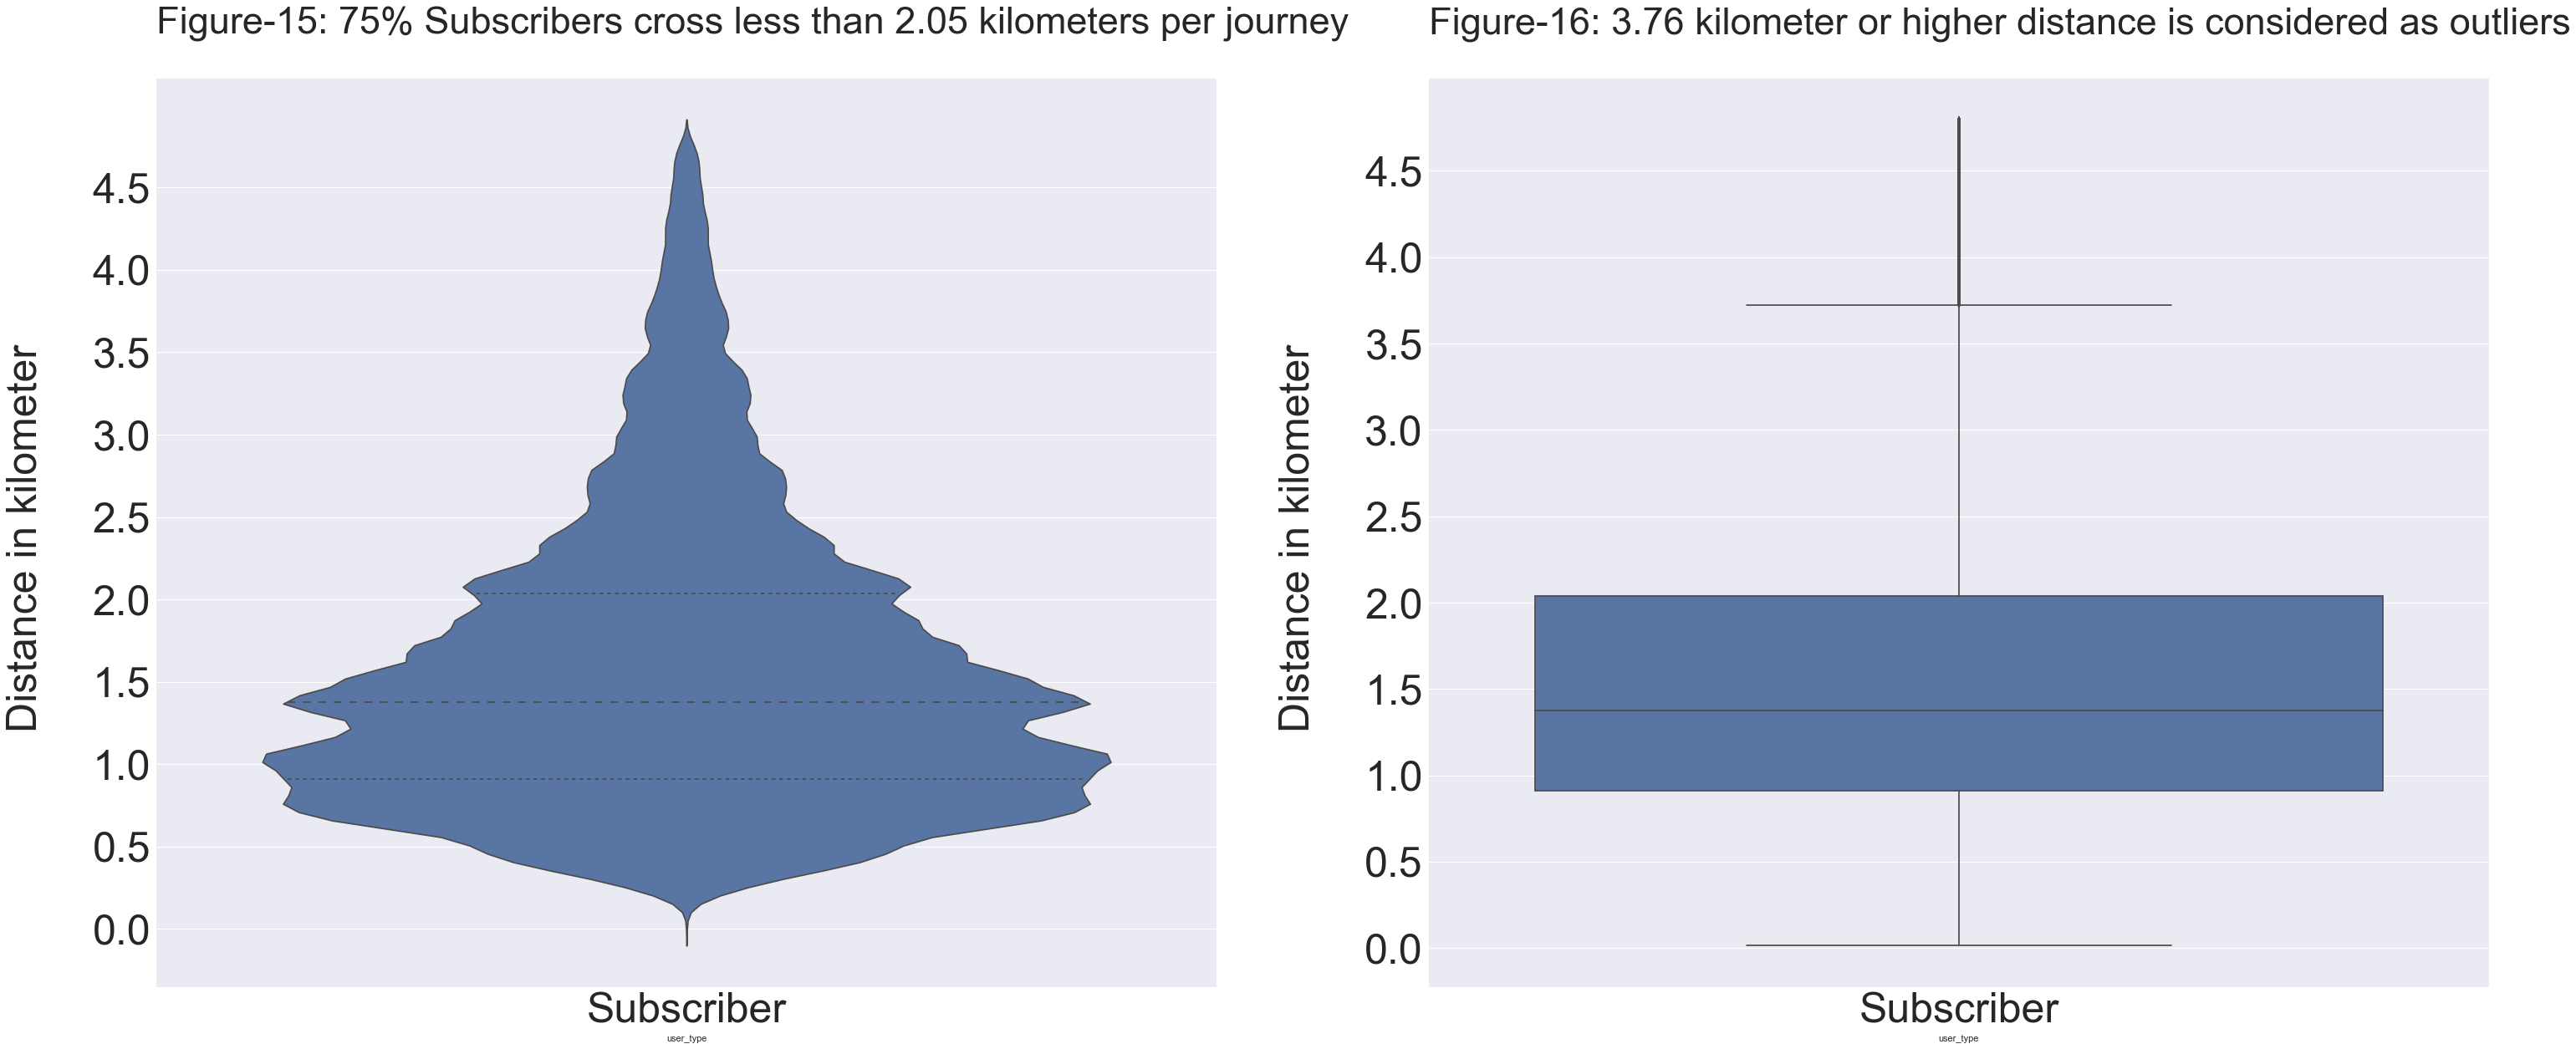

In [94]:
plt.figure(figsize = [50, 20])

# left plot: violin plot
base_color = sns.color_palette()[0]
plt.subplot(1, 2, 1)
sns.violinplot(data = df_subscriber_majority_distance, x = 'user_type', y = 'distance', color = base_color, inner='quartile')
plt.title('Figure-15: 75% Subscribers cross less than 2.05 kilometers per journey \n',fontsize=45,loc="left")
plt.ylabel("Distance in kilometer \n",fontsize=50)
plt.rc('xtick',labelsize=50)
plt.rc('ytick',labelsize=50)
plt.yticks(np.arange(0, 5, 0.5))
sns.despine(bottom=True, left=True)

plt.subplot(1, 2, 2)
sns.boxplot(data = df_subscriber_majority_distance, x = 'user_type', y = 'distance', color = base_color)
plt.title('Figure-16: 3.76 kilometer or higher distance is considered as outliers\n',fontsize=45,loc="left")
plt.ylabel("Distance in kilometer \n",fontsize=50)
plt.rc('xtick',labelsize=50)
plt.rc('ytick',labelsize=50)
plt.yticks(np.arange(0, 5, 0.5))
sns.despine(bottom=True, left=True)
plt.show()

In [25]:
duration_count = df.groupby(['user_type', 'day_type'], as_index=True).mean().duration_min
duration_count 

user_type   day_type
Customer    Weekday     25.291333
            Weekend     31.129321
Subscriber  Weekday     10.789164
            Weekend     12.192365
Name: duration_min, dtype: float64

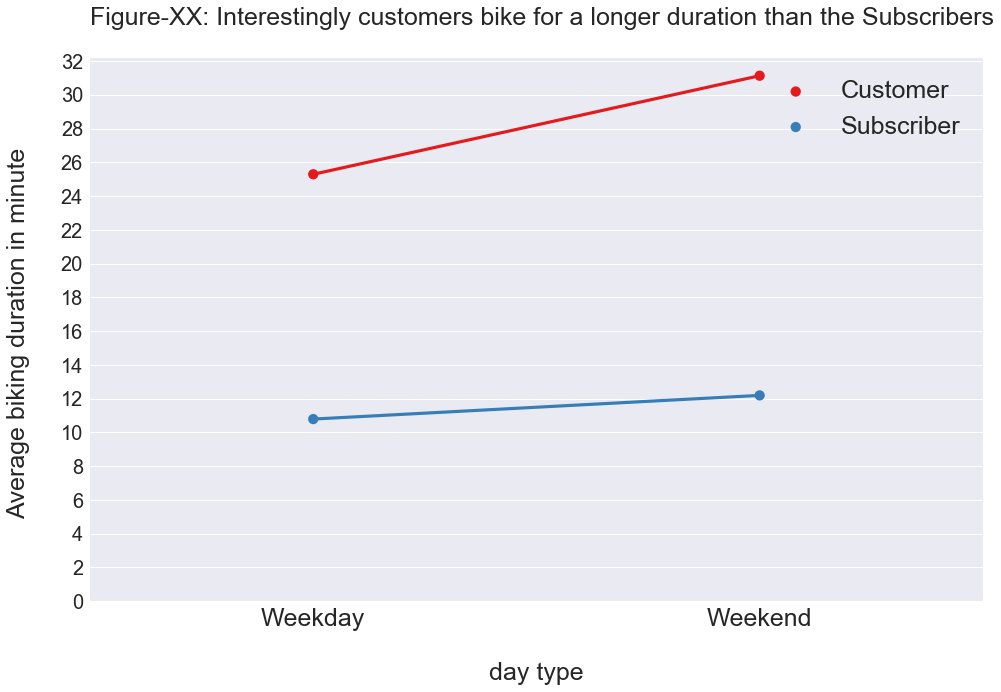

In [96]:
plt.figure(figsize = [16, 10])
sns.set(style="darkgrid")
ax = sns.pointplot(x="day_type", y="duration", data = duration_count, hue = 'user_type', palette="Set1")
plt.xlabel("\n day type ",fontsize=25)
plt.ylabel("Average biking duration in minute \n",fontsize=25)
plt.title('Figure-XX: Interestingly customers bike for a longer duration than the Subscribers\n',fontsize=25, loc="left")
plt.yticks(np.arange(0, max(duration_count['duration'])+1, 2.0), fontsize=20)
plt.xticks(fontsize=25)
plt.legend(loc='best', fontsize=25)
plt.show()


In [53]:
# Store the dataset
%store df_time
%store df_customer
%store df_subscriber

Stored 'df_time' (DataFrame)
Stored 'df_customer' (DataFrame)
Stored 'df_subscriber' (DataFrame)
